<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение библиотек</a></span><ul class="toc-item"><li><span><a href="#Подключение-алгоритмов-для-обучения" data-toc-modified-id="Подключение-алгоритмов-для-обучения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подключение алгоритмов для обучения</a></span></li></ul></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Деление-данные-на-выборки" data-toc-modified-id="Деление-данные-на-выборки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Деление данные на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Решающие-дерево" data-toc-modified-id="Решающие-дерево-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Решающие дерево</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Решающие-дерево" data-toc-modified-id="Решающие-дерево-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Решающие дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

## Введение  

### Задание

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### Описание данных 

- **сalls** — количество звонков
- **minutes** — суммарная длительность звонков в минутах
- **messages** — количество sms-сообщений
- **mb_used** — израсходованный интернет-трафик в Мб
- **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Подключение библиотек 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE 

### Подключение алгоритмов для обучения

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Изучение данных

In [3]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Исследование баланса классов

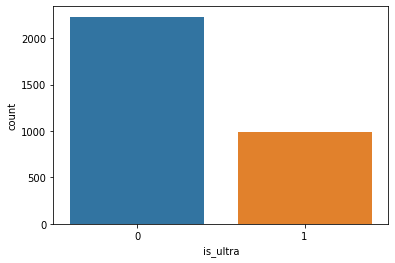

In [6]:
sns.countplot(x='is_ultra', data=data);

#### Вывод

Классы не сбалансированы, для более точной классификации можно сбалансировать классы 

## Деление данные на выборки

In [7]:
df_train, df_tmp = train_test_split(data, test_size=0.6, random_state=12345) 

In [8]:
df_test, df_valid = train_test_split(df_tmp, test_size=0.5, random_state=12345) 

In [9]:
def split_x_y(data):
    x = data.drop(['is_ultra'], axis=1)
    y = data['is_ultra']
    return x, y

In [10]:
df_train_x, df_train_y = split_x_y(df_train)

In [11]:
df_test_x, df_test_y = split_x_y(df_test)

In [12]:
df_valid_x, df_valid_y = split_x_y(df_valid)

## Исследование моделей 

<AxesSubplot:xlabel='is_ultra', ylabel='count'>

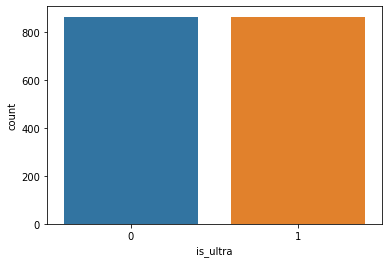

In [13]:
sm = SMOTE(random_state = 2) 
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y) 

sns.countplot(x='is_ultra', data=pd.DataFrame({'is_ultra' : df_train_y}))

### Решающие дерево

In [14]:
model = 0
bias  = []
variance = []
array_depth = []

for depth in range(1,16):
    array_depth.append(depth)
    
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(df_train_x, df_train_y)
    
    predictions = model.predict(df_train_x)
    bias.append(accuracy_score(df_train_y, predictions)) 
    
    predictions = model.predict(df_valid_x)
    variance.append(accuracy_score(df_valid_y, predictions))

In [15]:
decisionTreeResult = pd.DataFrame({'bais' : bias, 'variance' : variance, 'depth' : array_depth})

In [16]:
decisionTreeResult = decisionTreeResult.sort_values('variance',ascending=False)

In [17]:
decisionTreeResult.head()

,bais,variance,depth
2,0.704519,0.777202,3
1,0.674971,0.769948,2
7,0.804171,0.762694,8
5,0.764774,0.757513,6
4,0.750290,0.752332,5


### Вывод 

Решающие дерево даем максимальную точность при максимальное высоте равной 6

### Случайный лес

In [18]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(1, 101, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est ,max_depth=depth)
        model.fit(df_train_x, df_train_y)
        predictions = model.predict(df_valid_x)
        result = accuracy_score(predictions,df_valid_y)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

In [19]:
best_result

0.6601036269430052

## Проверьте модель на тестовой выборке

### Решающие дерево

In [20]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(df_train_x, df_train_y)
predictions = model.predict(df_test_x)
accuracy_score(df_test_y, predictions)

0.7935684647302904

### Случайный лес

In [21]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_est ,max_depth=best_depth)
model.fit(df_train_x, df_train_y)
predictions = model.predict(df_test_x)
accuracy_score(df_test_y, predictions)

0.7043568464730291

## (бонус) Проверьте модели на адекватность

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
